In [ ]:
project = "baseline"

In [ ]:
import numpy as np
np.random.seed(0)
import pandas as pd
from pandas.core.frame import DataFrame

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import joblib

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns; sns.set_theme()

# Dataset

In [ ]:
# balanced training set
train_balanced = pd.read_csv("/content/drive/MyDrive/20221028/dataset/train_balanced.csv")

# validation set
df_valid = pd.read_csv("/content/drive/MyDrive/20221028/dataset/valid.csv")

# test set
df_test = pd.read_csv("/content/drive/MyDrive/20221028/dataset/test.csv")

In [ ]:
# split X, y
if project = "baseline": 
    X_train = train_balanced.iloc[:, 0:-1]
    y_train = train_balanced.iloc[:, -1]
else: 
   # synthetic data set
    df_fake_path = f"/content/drive/MyDrive/20221108/dataset/fake_{project}.csv"
    df_fake = pd.read_csv(df_fake_path)

    # mix these two sets 
    train_mix = pd.concat([train_balanced, df_fake])
    from sklearn.utils import shuffle
    train_mix= shuffle(train_mix, random_state = 96)

    X_train = train_mix.iloc[:, 0:-1]
    y_train = train_mix.iloc[:, -1]



X_valid = df_valid.iloc[:, 0:-1]
y_valid = df_valid.iloc[:, -1]
X_test = df_test.iloc[:, 0:-1]
y_test = df_test.iloc[:, -1]

# Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

## validation

In [ ]:
# fine tune
arr = []
for i in range (50,151,5):
    for j in range (3,21):    
        acc_arr = []
        rf = RandomForestClassifier(n_estimators= i, max_depth = j, random_state = 12)
        rf = rf.fit(X_train, y_train)
        acc_valid = rf.score(X_valid, y_valid)
        acc_test = rf.score(X_test, y_test)

        acc_arr.append(i)
        acc_arr.append(j)
        acc_arr.append(acc_valid)
        acc_arr.append(acc_test)
        arr.append(acc_arr)

In [ ]:
# find max validation accuracy
arr_rf = DataFrame(arr)
arr_rf.columns = ["n_estimators", "max_depth", "acc_valid", "acc_test"]
rf_max = arr_rf[arr_rf["acc_valid"]==arr_rf["acc_valid"].max()]
print(rf_max)

     n_estimators  max_depth  acc_valid  acc_test
117            80         12       0.67     0.585


In [ ]:
# save validation record
# arr_rf_path = f"/content/drive/MyDrive/20221108/saved_model/{project}_rf_heatmap.csv"
# arr_rf.to_csv(arr_rf_path, index=False)
# call record
# arr_rf = pd.read_csv(arr_rf_path)


accuracy heatmap:


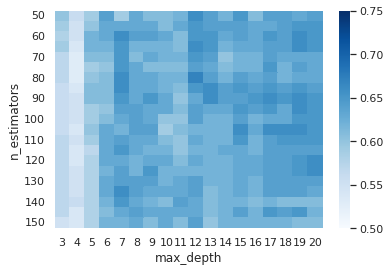

In [ ]:
# valid heatmap plot
sns.set(font_scale = 1)
arr_test_heatmap = arr_rf.pivot("n_estimators", "max_depth", "acc_valid")
ax_test = sns.heatmap(arr_test_heatmap, cmap = "Blues", vmin=0.5, vmax= 0.75)
print("\naccuracy heatmap:")
plt.show()


accuracy heatmap:


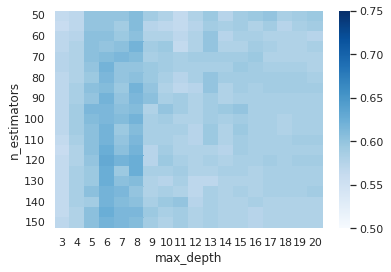

In [ ]:
# test heatmap plot
sns.set(font_scale = 1)
arr_test_heatmap = arr_rf.pivot("n_estimators", "max_depth", "acc_test")
ax_test = sns.heatmap(arr_test_heatmap, cmap = "Blues", vmin=0.5, vmax= 0.75)
print("\naccuracy heatmap:")
plt.show()

## result

In [ ]:
rf = RandomForestClassifier(n_estimators=80, max_depth = 12, random_state = 12)
rf = rf.fit(X_train, y_train)

In [ ]:
# save model
# joblib.dump(rf, f"/content/drive/MyDrive/20221108/saved_model/{project}_rf.joblib")

              precision    recall  f1-score   support

           0     0.6491    0.7400    0.6916        50
           1     0.6977    0.6000    0.6452        50

    accuracy                         0.6700       100
   macro avg     0.6734    0.6700    0.6684       100
weighted avg     0.6734    0.6700    0.6684       100


Confusion matrix:


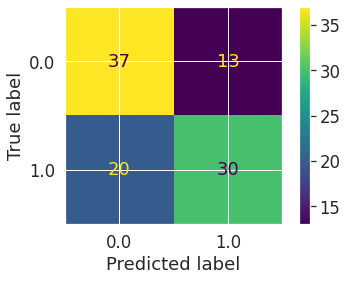

In [ ]:
# valid
acc = rf.score(X_valid, y_valid)
predictions = rf.predict(X_valid)

target_names = ['0','1']
print(classification_report(y_valid, predictions, target_names=target_names, digits=4))

cm = confusion_matrix(y_valid, predictions, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_,)
sns.set(font_scale = 1.5)
disp.plot()
print("\nConfusion matrix:")
plt.show()

              precision    recall  f1-score   support

           0     0.5780    0.6300    0.6029       100
           1     0.5934    0.5400    0.5654       100

    accuracy                         0.5850       200
   macro avg     0.5857    0.5850    0.5842       200
weighted avg     0.5857    0.5850    0.5842       200


Confusion matrix:


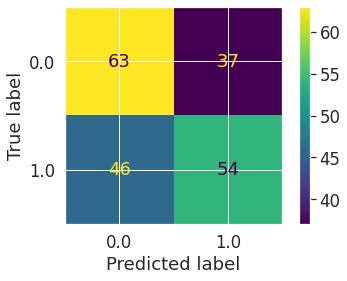

In [ ]:
# test
acc = rf.score(X_test, y_test)
predictions = rf.predict(X_test)

target_names = ['0','1']
print(classification_report(y_test, predictions, target_names=target_names, digits=4))

cm = confusion_matrix(y_test, predictions, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_,)
sns.set(font_scale = 1.5)
disp.plot()
print("\nConfusion matrix:")
plt.show()

# XGBoost

In [ ]:
from xgboost import XGBClassifier

## validation

In [ ]:
# fine tune
arr = []
for i in range (50 ,151,5):
    for j in range (3,21):
        acc_arr = []
        xgb = XGBClassifier(n_estimators= i, max_depth = j, random_state = 12)
        xgb = xgb.fit(X_train, y_train)
        acc_valid = xgb.score(X_valid, y_valid)
        acc_test = xgb.score(X_test, y_test)

        acc_arr.append(i)
        acc_arr.append(j)
        acc_arr.append(acc_valid)
        acc_arr.append(acc_test)
        arr.append(acc_arr)

In [ ]:
# find max validation accuracy
arr_xgb = DataFrame(arr)
arr_xgb.columns = ["n_estimators", "max_depth", "acc_valid","acc_test"]
xgb_max = arr_xgb[arr_xgb["acc_valid"]==arr_xgb["acc_valid"].max()]
print(xgb_max)

    n_estimators  max_depth  acc_valid  acc_test
38            60          5       0.64      0.58
92            75          5       0.64      0.58


In [ ]:
# save validation record
# arr_xgb_path = f"/content/drive/MyDrive/20221108/saved_model/{project}_xgb_heatmap.csv"
# arr_xgb.to_csv(arr_xgb_path, index=False)


accuracy heatmap:


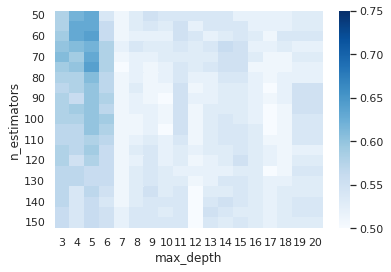

In [ ]:
# valid heatmap plot
sns.set(font_scale = 1)
arr_test_heatmap = arr_xgb.pivot("n_estimators", "max_depth", "acc_valid")
ax_test = sns.heatmap(arr_test_heatmap, cmap = "Blues", vmin=0.5, vmax= 0.75)
print("\naccuracy heatmap:")
plt.show()


accuracy heatmap:


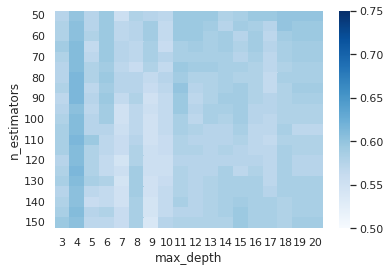

In [ ]:
# test heatmap plot
sns.set(font_scale = 1)
arr_test_heatmap = arr_xgb.pivot("n_estimators", "max_depth", "acc_test")
ax_test = sns.heatmap(arr_test_heatmap, cmap = "Blues", vmin=0.5, vmax= 0.75)
print("\naccuracy heatmap:")
plt.show()

## result

In [ ]:
xgb = XGBClassifier(n_estimators=60, max_depth = 5, random_state = 12)
xgb = xgb.fit(X_train, y_train)

In [ ]:
# save model
# joblib.dump(xgb, f"/content/drive/MyDrive/20221028/model/{project}_xgb.joblib")

              precision    recall  f1-score   support

           0     0.6296    0.6800    0.6538        50
           1     0.6522    0.6000    0.6250        50

    accuracy                         0.6400       100
   macro avg     0.6409    0.6400    0.6394       100
weighted avg     0.6409    0.6400    0.6394       100


Confusion matrix:


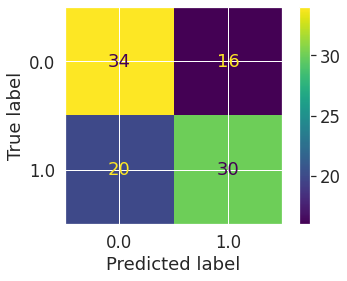

In [ ]:
# valid
acc = xgb.score(X_valid, y_valid)
predictions = xgb.predict(X_valid)
target_names = ['0','1']
print(classification_report(y_valid, predictions, target_names=target_names, digits=4))

cm = confusion_matrix(y_valid, predictions, labels=xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)
sns.set(font_scale = 1.5)
disp.plot()
print("\nConfusion matrix:")
plt.show()

              precision    recall  f1-score   support

           0     0.5769    0.6000    0.5882       100
           1     0.5833    0.5600    0.5714       100

    accuracy                         0.5800       200
   macro avg     0.5801    0.5800    0.5798       200
weighted avg     0.5801    0.5800    0.5798       200


Confusion matrix:


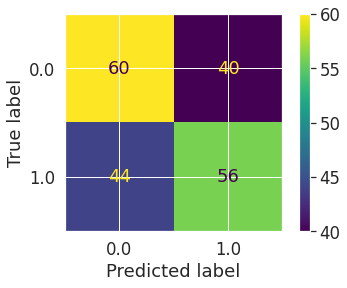

In [ ]:
# test
acc = xgb.score(X_test, y_test)
predictions = xgb.predict(X_test)
target_names = ['0','1']
print(classification_report(y_test, predictions, target_names=target_names, digits=4))

predictions = xgb.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)
sns.set(font_scale = 1.5)
disp.plot()
print("\nConfusion matrix:")
plt.show()